<a href="https://colab.research.google.com/github/paamelaamaro/Challenge_TelecomX_parte2/blob/main/Challeng_Telecom_x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extração dos dados


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:
dados = pd.read_csv('/content/dados_tratados (1).csv')
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [ ]:
dados.shape

(7043, 22)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [ ]:
dados.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##Tirando colunas irrelevantes


In [ ]:
dados = dados.drop(columns=["customerID"])

##Preparando os dados

In [ ]:
df_clean = dados.copy()

cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [ ]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## Remover os valores nulos das duas colunas

In [ ]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [ ]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## Normalização dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

dados.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0.0,Yes,Yes,0.125000,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.484680,0.471144,0.066294
1,No,Male,0.0,No,No,0.125000,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.431755,0.414428,0.060420
2,Yes,Male,0.0,No,No,0.055556,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.523677,0.553731,0.030239
3,Yes,Male,1.0,Yes,No,0.180556,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.754875,0.793532,0.140670
4,Yes,Female,1.0,Yes,No,0.041667,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.699164,0.653234,0.028687


##Correlação entre as variáveis

In [ ]:
corr = df_encoded.corr()

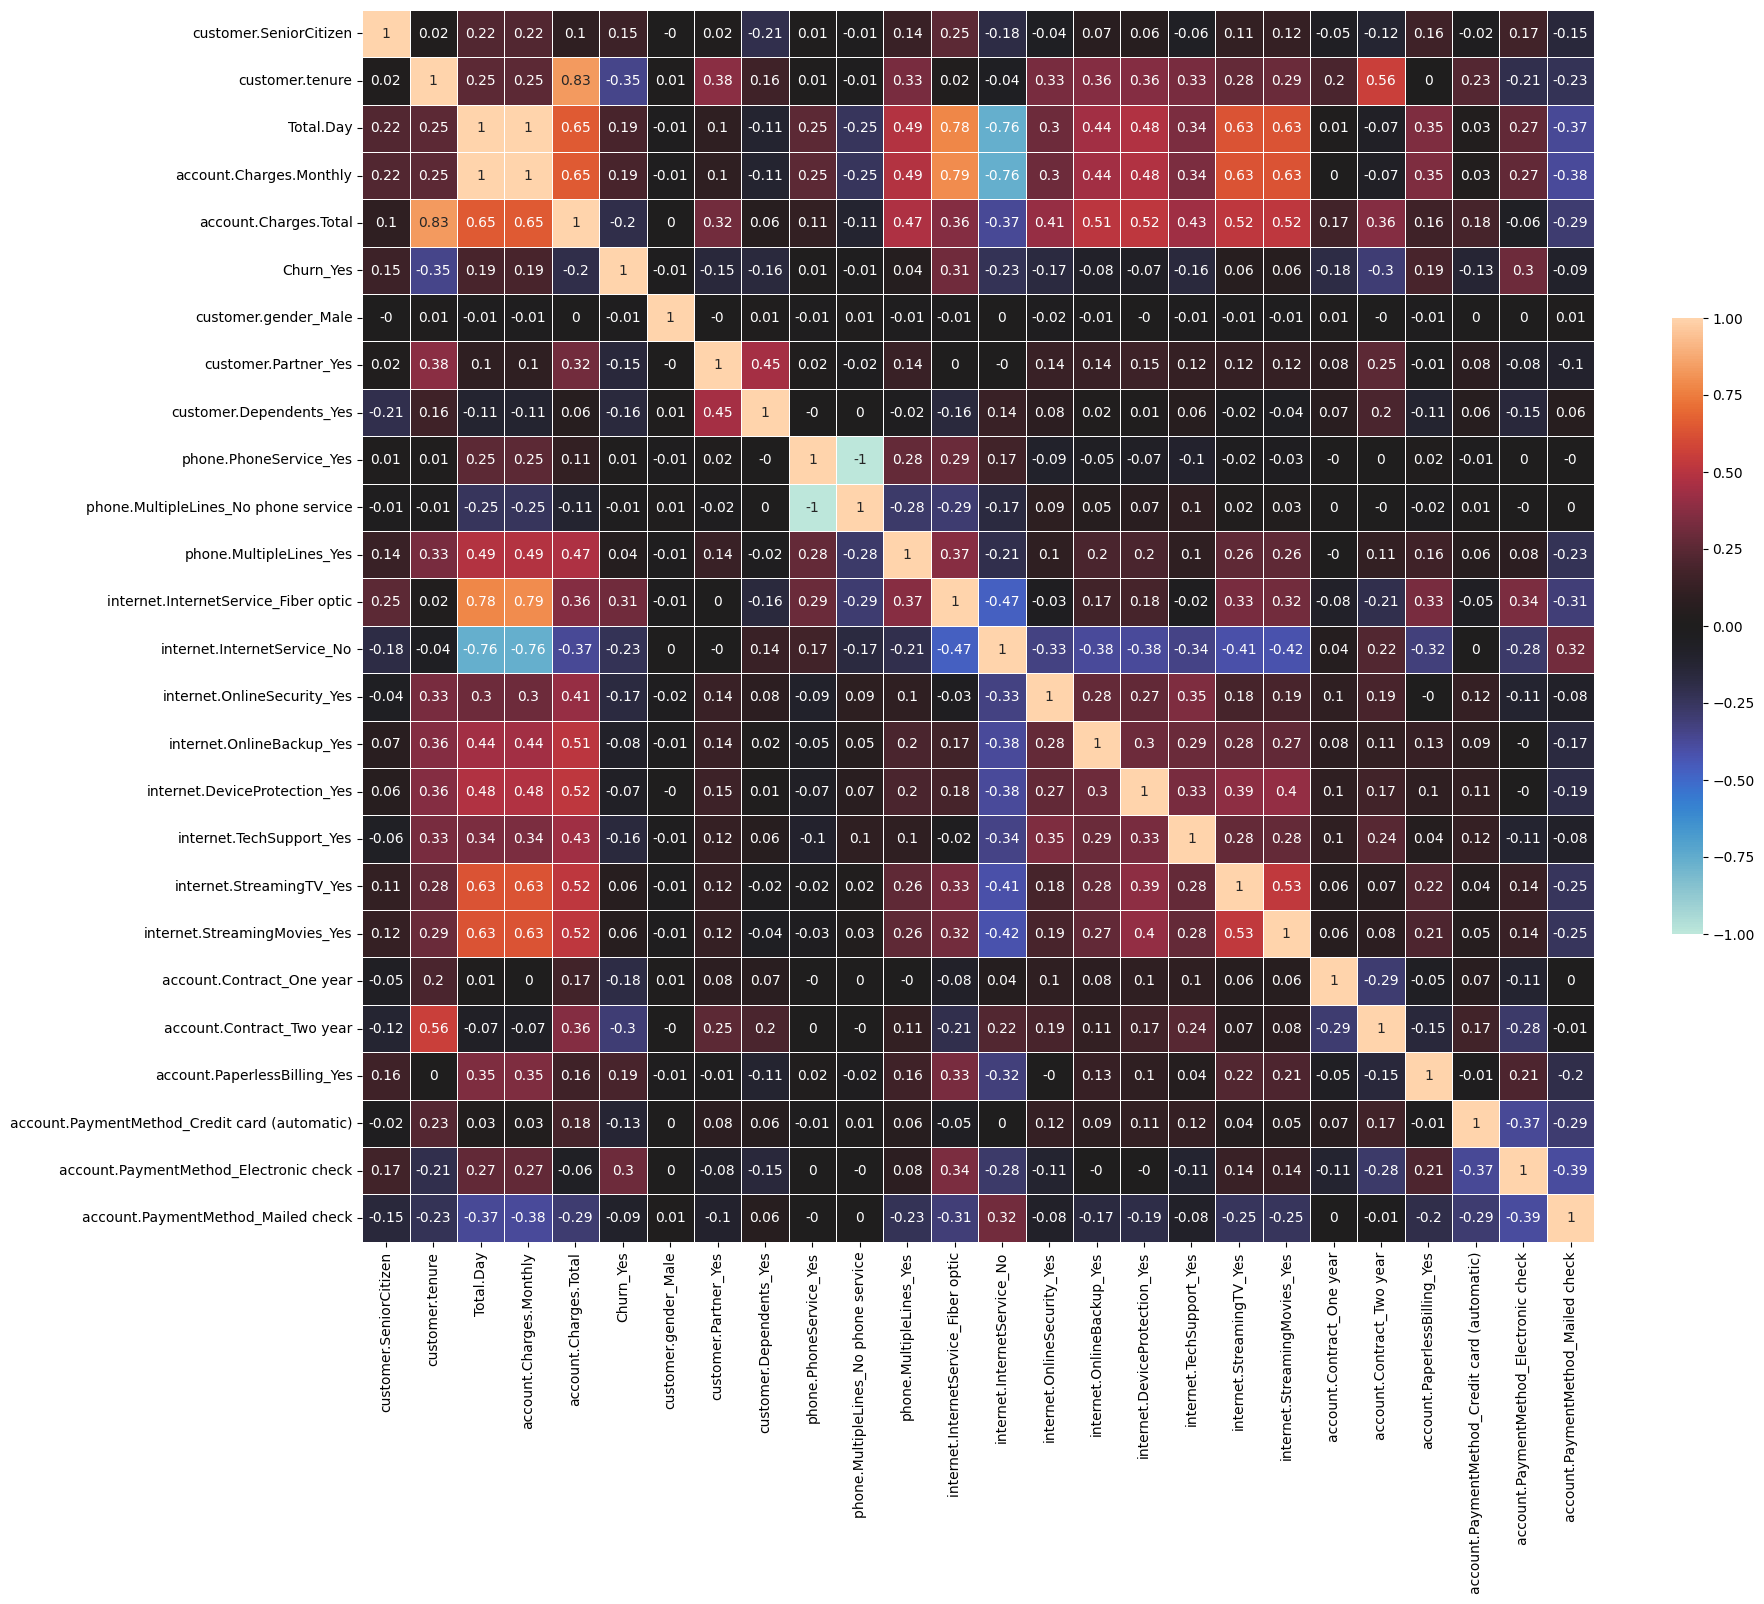

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

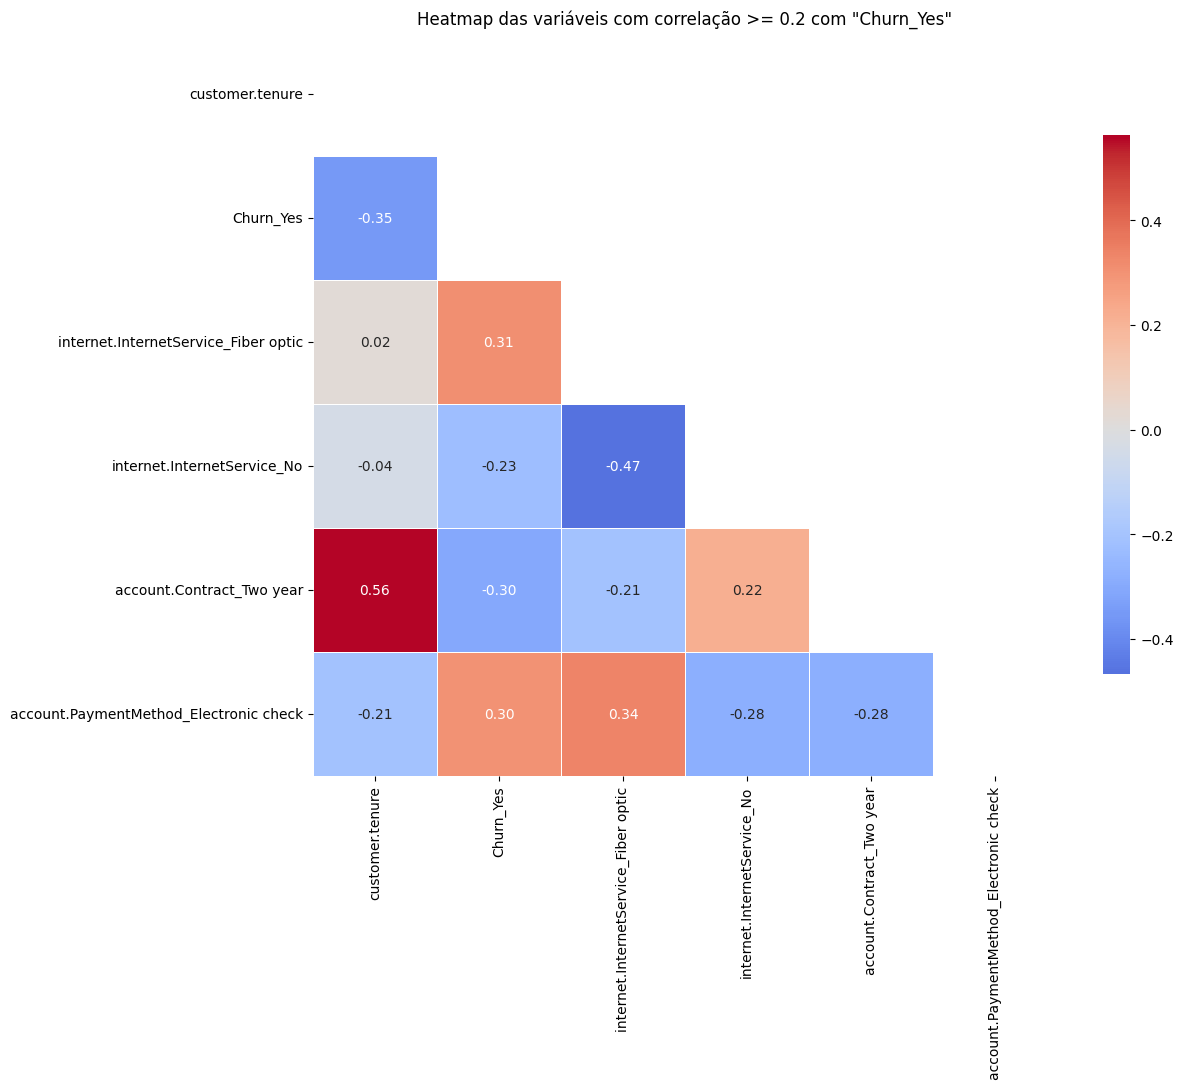

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_var = 'Churn_Yes'


limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]


mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

## Análise de Multicolinearidade

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = df_encoded.drop(columns=['Churn_Yes'])

In [ ]:
X_const = add_constant(X)

In [ ]:
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


X_filtered = X_const.copy()


cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

X_filtered.drop(columns=["Total.Day"], inplace=True)


X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)


X_filtered = X_filtered.astype(float)


vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


##Modelos preditivos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

##Regressão Logística

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)


y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



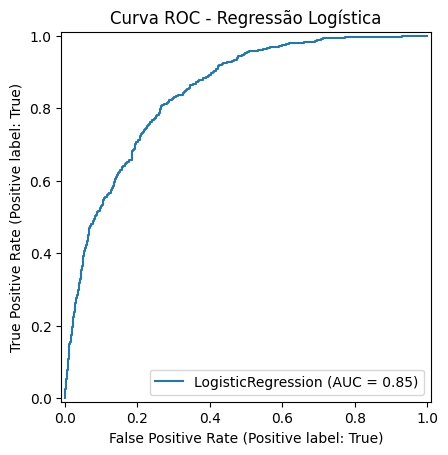

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot the ROC curve
RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title('Curva ROC - Regressão Logística')
plt.show()

##Rondom Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)


y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]


print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



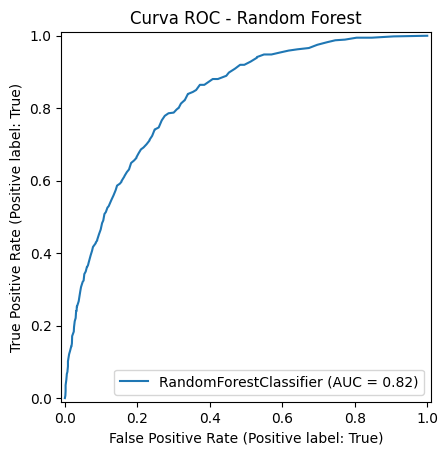

In [ ]:
# Plot the ROC curve for Random Forest
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
plt.title('Curva ROC - Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    # Previsões
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    # Relatório
    print(f"\n📊 Modelo: {nome_modelo}")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.title(f"Curva ROC - {nome_modelo}")
    plt.legend()
    plt.grid()
    plt.show()


##Decision Tree


📊 Modelo: Decision Tree
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1549
        True       0.48      0.52      0.50       561

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.72      0.73      2110



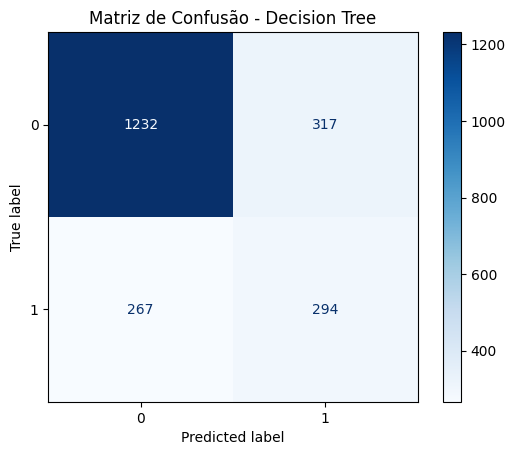

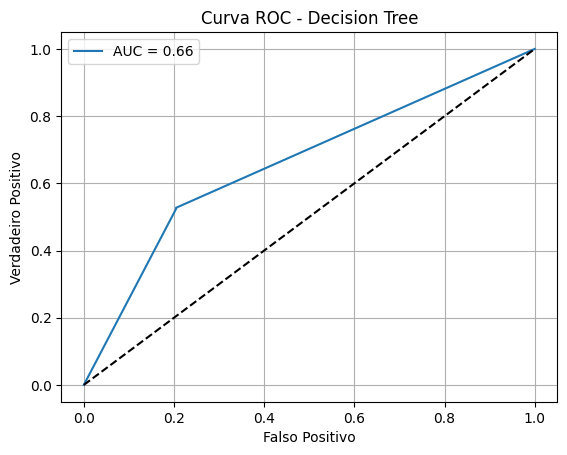

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

avaliar_modelo(dt, X_test, y_test, "Decision Tree")


##KNN


📊 Modelo: KNN
              precision    recall  f1-score   support

       False       0.83      0.85      0.84      1549
        True       0.55      0.52      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110



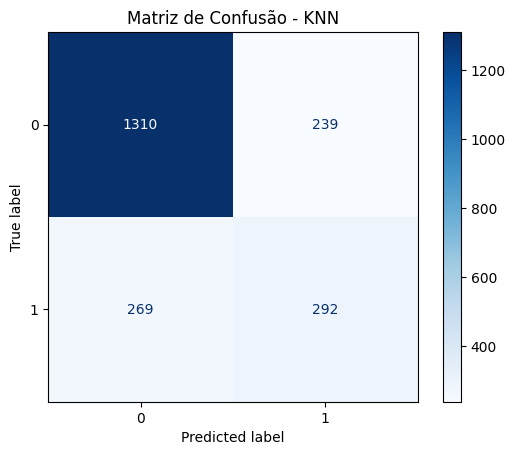

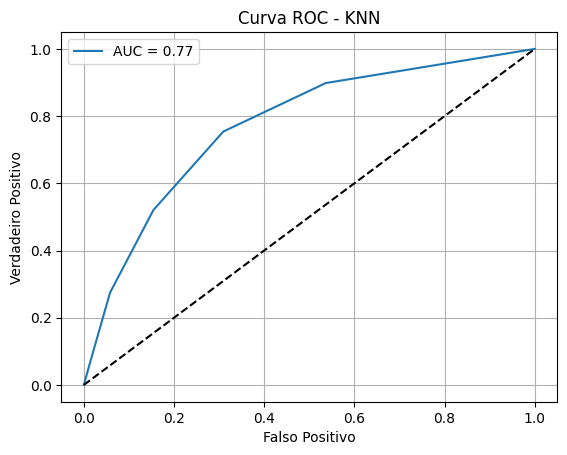

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_knn, y_train)
avaliar_modelo(knn, X_test_knn, y_test, "KNN")


##SVM



📊 Modelo: SVM
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1549
        True       0.66      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



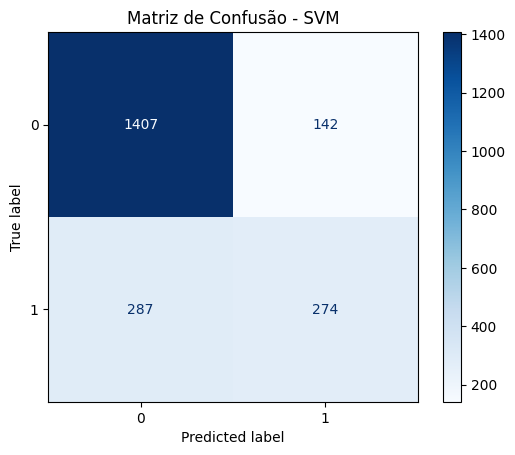

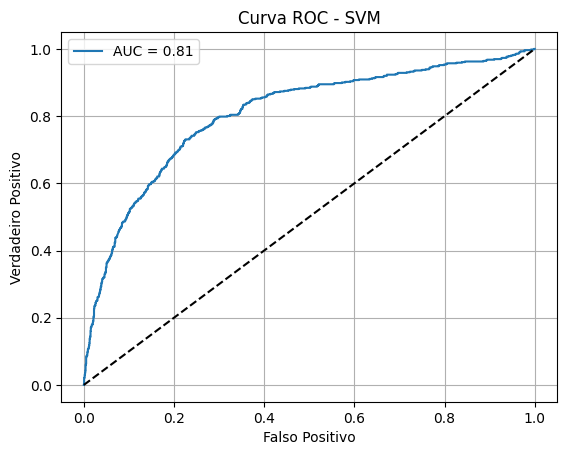

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_knn, y_train)
avaliar_modelo(svm, X_test_knn, y_test, "SVM")


##Variáveis mais influentes na evasão de clientes

/tmp/ipython-input-923414279.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.head(15).values, y=importancias.head(15).index, palette='Blues_d')
/tmp/ipython-input-923414279.py:21: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


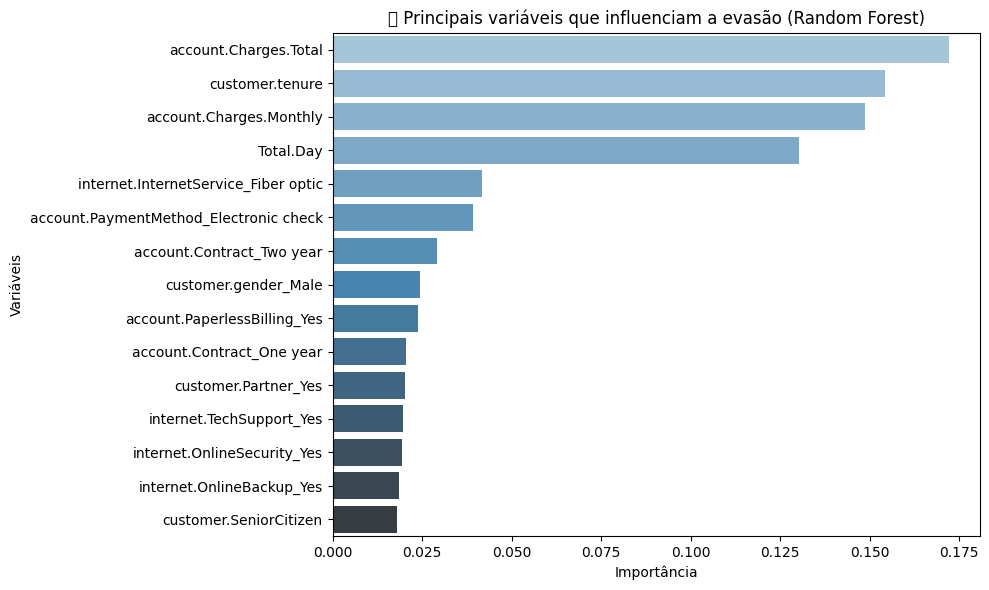

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X = df_encoded.drop(columns=['Churn_Yes'], errors='ignore')
y = df_encoded['Churn_Yes']

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X, y)


importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=importancias.head(15).values, y=importancias.head(15).index, palette='Blues_d')
plt.title('🎯 Principais variáveis que influenciam a evasão (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# 📊 Relatório Final - Análise de Evasão de Clientes com Random Forest

---

## 🔢 Modelo Escolhido: Random Forest

Durante o processo de modelagem, diversos algoritmos foram testados, incluindo Regressão Logística, SVM, KNN e XGBoost. Apesar de a SVM apresentar boa acurácia (80%), o modelo **Random Forest** demonstrou melhor desempenho ao lidar com a classe de maior interesse: os clientes que **evadiram**.

### ✅ Por que Random Forest foi o melhor modelo?
- **AUC = 0.82**: excelente capacidade de discriminar entre clientes que ficaram e os que saíram.
- **Recall = 0.60 para clientes que evadiram**: o modelo conseguiu identificar 60% dos casos reais de churn.
- **F1-Score = 0.59 para churn**: balanço entre precisão e sensibilidade foi superior aos demais modelos.

Essas métricas são essenciais, pois em problemas de churn o principal objetivo é **identificar clientes com risco de evasão para agir antes que deixem a empresa**.

---

## 📈 Principais Variáveis que Influenciam a Evasão

O modelo Random Forest também nos permitiu identificar as variáveis mais relevantes para a previsão de churn. As 5 variáveis com maior influência foram:

1. **Tempo de contrato (`customer.tenure`)**
2. **Tipo de contrato (`account.Contract`)**
3. **Total gasto (`account.Charges.Total`)**
4. **Serviço de internet (`internet.InternetService`)**
5. **Serviços adicionais (como `internet.OnlineSecurity` e `internet.TechSupport`)**

Essas variáveis indicam que clientes que permanecem pouco tempo na empresa, que possuem contratos mensais e gastam menos têm maior propensão à evasão.

---

## 🔎 Recomendações e Soluções Propostas

Com base nas variáveis mais influentes, podemos sugerir algumas ações:

- **Incentivar contratos de maior prazo**, oferecendo benefícios para planos anuais ou bienais.
- **Identificar clientes com baixa permanência** e oferecer ofertas personalizadas para retê-los.
- **Monitorar clientes com baixo valor de gasto total**, pois esses são mais suscetíveis a sair.
- **Oferecer pacotes com suporte técnico e segurança online**, pois a ausência desses está relacionada à maior taxa de churn.

Essas estratégias podem ajudar a reduzir significativamente a evasão e aumentar a fidelização dos clientes.

---

## 📝 Conclusão

O modelo Random Forest demonstrou ser a melhor escolha para o problema de churn da empresa Telecom, não apenas pelo seu desempenho quantitativo, mas também pela sua capacidade de explicar **quais variáveis mais impactam o comportamento dos clientes**. As informações extraídas podem agora ser transformadas em **ações de retenção estratégica**, guiadas por dados confiáveis.
